# Übung 3 - Bilderstapel und  3D-Visualisierung
***

**Name:** NICHT VERGESSEN!
<br>
**Matr.-Nr.:** NICHT VERGESSEN!

---

## Bearbeitungszeitraum

**Bearbeitungsbegin:** Mo, 03.06.2019
<br>
**Abgabe:** So, 23.06.2019, 23:55 Uhr

---

## Aufgabenbeschreibung

Die Ergebnisse von tomographischen Bildgebungsverfahren (z.B. Computertomographie, Magnetresonanztomographie oder Positronen-Emissionstomographie) sind Stapel von z.T. mehreren hundert Schnitt-/Schichtbildern primär in der Transversalebene.
Aus diesen *Originalbildern* können weitere Ebenen für eine Visualisierung berechnet werden. Der Bildstapel einer Ebene kann jedoch auch Basis einer 3D-Visualisierung sein.

Innerhalb dieser Übung sollen zwei Ziele erreicht werden:
1. Umgang mit Bilderstapeln und deren Visualisierung sowie die Verarbeitung der einzelnen Schichtbilder als Vorbereitung einer 3D-Rekonstruktion
2. Rekonstruktion und Visualisierung eines 3D-Modells auf Basis eines (vorverarbeiteten) Bildstapels 

Den in dieser Übung zu verwendenden Bildstapel laden Sie bitte unter folgendem Link herunter: <https://mri.radiology.uiowa.edu/VHDicom/VHFCT1mm/VHF-Head.tar.gz>

Der Datensatz ist den *CT Datasets (Visible Female CT Datasets)* des *Visible Human Project* (<https://www.nlm.nih.gov/research/visible/visible_human.html>) entnommen.

### Wichtige Hinweise zur Übung

- Für die Realisierung von **Aufgabe 4** und des **Bonusteils** sind externe Bibliotheken ausdrücklich zugelassen.
- Sollten Sie Bibliotheken verwenden, die sich nicht mittels `pip` oder `conda` installieren lassen bzw. externe Abhängigkeiten haben (z.B. OpenCV, VTK), müssen Sie Ihre Lösung innerhalb der Übung an Ihrem Arbeitsplatz vorstellen.
- Die Vorstellung muss bis spätestens **20.06.2019** erfolgen.
- Das Notebook wird parallel wie gewohnt über Moodle abgegeben.
- Listen Sie vor jeder Aufgabe die von Ihnen ggf. verwendeten externen Bibliotheken auf.
- Sollte keine Vorstellung erfolgen, werden nur die über Moodle abgegebenen und mit den *Standard-Paketen* (siehe Foliensatz **Organisatorisches**) bzw. nachinstallierbaren Paketen (mittels `pip` oder `conda`) ausführbaren Teile Ihrer Lösung bewertet.


**Generelle Hinweise zur Bearbeitung:** 

Für die Visualisierung soll das `matplotlib`-Paket verwendet werden. Alle Bilder sollen *inline* in diesem Notebook ausgegeben werden. Ausnahmen sind bei den jeweiligen Aufgaben genannt.


**Weitere Hinweise zur Abgabe**

- Füllen Sie unbedingt die erste Zelle unterhalb der Überschrift mit Name und Matr.-Nr. aus!
- Ergänzen Sie den Dateinamen des Notebooks vor der Abgabe um `_` und Ihre Matr.-Nr. (`Uebung 3 - Bilderstapel und 3D-Visualisierung_s0500000.ipynb`)
- Entfernen Sie vor dem Upload alle Ausgaben aus dem Notebook!
- Der verwendete Bildstapel muss nicht abgegeben werden.

**Hinweise zur Benotung**

- Die Aufgabe wird nach dem üblichen Notenschema von 1,0 bis 5,0 bewertet.
- Diese Aufgabe wird mit 40% in der Gesamtnote der Übung gewichtet.

### Viel Erfolg!

---
---

### Aufgaben:

**1. Einlesen und Visualisieren des DICOM-Bildstapels**

Lesen Sie alle DICOM-Bilder des Verzeichnisses ein.
Visualisieren Sie den Bildstapel mit Hilfe eines interaktiven **Sliders** über den durch den Bildstapel navigiert werden kann. 

**Hinweise:**
- Verwenden Sie die Ihnen bekannte Bibliothek `pydicom` zum Einlesen der DICOM-Dateien.
- Nutzen sie das Paket `ipywidgets` zur Realisierung der interaktiven Elemente.
- Achten Sie beim Umgang mit Dateien und Verzeichnissen darauf, dass nicht immer nach Dateinamen sortierte Listen zurückgegeben werden.

In [30]:
import pydicom
import numpy as np 
import os
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, fixed


filesNew = []
datenSatz = []


output_path = './Head/'
print()
    
def load_scan(path):
    slices = [pydicom.read_file(path + '/' + s) for s in os.listdir(path)]
    slices.sort(key = lambda x: int(x.InstanceNumber))
    try:
        slice_thickness = np.abs(slices[0].ImagePositionPatient[2] - slices[1].ImagePositionPatient[2])
    except:
        slice_thickness = np.abs(slices[0].SliceLocation - slices[1].SliceLocation)
        
    for s in slices:
        s.SliceThickness = slice_thickness
      
    return slices

for s in load_scan('./Head/'):
    h = s.pixel_array
    datenSatz.append(s)
    filesNew.append(h)




    
def show_image(image_stack, sliceNumber):
    pxl_ar = image_stack[sliceNumber]
    #print(np.array_equal(pxl_ar,filesNew[sliceNumber]))
    plt.imshow(pxl_ar, cmap= plt.cm.gray)
    plt.show()
    

slider = widgets.IntSlider(min=0,max=len(filesNew)-1,step=1,value = 0, continuous_update=False)
interact(show_image, image_stack = fixed(filesNew), sliceNumber = slider);




interactive(children=(IntSlider(value=0, continuous_update=False, description='sliceNumber', max=233), Output(…

**2. Konvertierung des DICOM-Bildstapels in Binärbilder**

Implementieren sie eine Funktion zur Konvertierung eines Bildes in das Binärformat anhand eines gegebenen Schwellenwertes.

In CT-DICOM-Bildern zeichnen sich die Bereiche des Untersuchungsobjektes über vergleichsweise hohe Signalwerte aus. Im Gegensatz dazu ist der Hintergrund durch niedrige Signalwerte gekennzeichnet. Mit Hilfe der binären Konvertierung kann das Objekt vom Hintergrund getrennt werden.

Ihre Funktion soll die Pixel des Bildes anhand eines Vergleichs mit einem gegebenen Schwellenwert (Funktionsparameter) dem Hintergrund bzw. dem Objekt zuordnen:
- Pixelwert < Schwellenwert: Pixel ist Hintergrundpixel
- Pixelwert >= Schwellenwert: Pixel ist Objektpixel

Wenden Sie Ihre Funktion auf alle Bilder des Stapels an. Wählen Sie hierzu einen Schwellenwert von **250**.

Visualisieren Sie den konvertierten Bilderstapel analog zu **1.** (der Hintergrund soll in schwarz, das Objekt in weiß dargestellt werden).

In [2]:
threshold = 250
binary_stack = []

image = filesNew

def to_binary(image, threshold):
    return ( image >= threshold)*1 

for image in filesNew:
    binary_stack.append(to_binary(image, threshold))


#print(len(binary_stack))
#print(np.array_equal(binary_stack[0],filesNew[0]))
    

slider = widgets.IntSlider(min=0,max=len(binary_stack)-1,step=1,value = 0, continuous_update=False)
interact(show_image, image_stack = fixed(binary_stack), sliceNumber = slider);



#def binarySlice (sliceNumber,threshold):
#    choosen_slice = binary_stack[sliceNumber]
#    pxl_array = choosen_slice.pixel_array
#    binarize = np.array(pxl_array >= threshold)
     
#    plt.imshow(pxl_array, cmap = plt.cm.gray)
#    plt.show()
    

#slider = widgets.IntSlider(min=0,max=len(binary_stack)-1,step=1,value = 0, continuous_update=False)
#interact(show_image, image_stack = fixed(binary_stack), sliceNumber = slider);



interactive(children=(IntSlider(value=0, continuous_update=False, description='sliceNumber', max=233), Output(…

**3. Optimieren der Binärbilder**

Anhand der Visualisierung in **2.** ist zu erkennen, dass die Bilder z.T. kleine Artefakte im Hintergrund bzw. *Löcher* innerhalb des Objektes aufweisen. Der Objektrand ist teilweise sehr *ausgefranst*. Auf einigen Bildern sind Bereiche des Untersuchungstisches im Bild vorhanden.

Versuchen Sie diese *ungünstigen* Eigenschaften der Bilder auszugleichen.

1. Morphologische Operationen (Erosion, Dilatation, Öffnung, Schließung) zur Glättung der Objektränder, Schließung kleinerer Löcher im Objekt oder Entfernung kleinerer Artefakte
    - Achten Sie auf die Reihenfolge der Operationen und deren Kombinationsmöglichkeiten
2. Definieren eines **globalen** Objektbereichs über ein Rechteck. Alle Pixel außerhalb dieses Objektbereiches sind automatisch Hintergrund. Wenden Sie den von Ihnen definierten Objektbereich auf alle Bilder des Stapels an.
    - Achten Sie bei der Festlegung des Objektbereichs darauf, dass keine Teile der korrekten Objekte versehentlich entfernt werden.

**Weitere Optimierungen werden als Bonus gewertet.**

Visualisieren Sie den optimierten Binärbildstapel analog zu **1.**

**Hinweis:**
- Die morphologische Operationen sind in den zugelassenen *Standard-Paketen* enthalten und dürfen verwendet werden.

In [28]:
import scipy.ndimage as sc

binst = binary_stack

#print(len(pxl))



opt_binst = []

#region of interest
vert_min = 115
vert_max = 365
horiz_min = 72
horiz_max = 450

def optimize_binary(binst,vert_min,vert_max,horiz_min,horiz_max):
    roi = binst[vert_min:vert_max,horiz_min:horiz_max]
    
    #Morphological operations
    ero = sc.binary_erosion(roi)
    dil = sc.binary_dilation(ero)
    return dil

for binst in binary_stack:
    opt_binst.append(optimize_binary(binst,vert_min,vert_max,horiz_min,horiz_max))
    
print(np.array_equal(opt_binst[0], opt_binst[2]))

#plt.imshow(opt_binst[20], cmap= plt.cm.gray)


slider = widgets.IntSlider(min=0,max=len(opt_binst)-1,step=1,value = 0, continuous_update=False)
interact(show_image, image_stack = fixed(opt_binst), sliceNumber = slider);




#######


# alles im hintergrund auf 0 setzen
#pxlTestLinkRechts = pxl[365:512 , 450:512] # mitte nach unten  , mitte bis rechts
#pxlTestObUnt = pxl[0:115 , 0:72] #oben nach unten , links nach rechts mitte

#pxlclip = pxl[0:115 , 0:72]
#plt.imshow(pxlclip )
#pxl11 = pxl[365:512 , 0:512] # gucken ob der tisch angezeigt wird bzw schwarze balken rechts links

########

#print(np.array_equal(pxl1, pxl))
#print(len(pxl1), len(pxl))


########


#Plot new and old 
#plt.subplot(2,2,1)
#plt.imshow(ero ,cmap=plt.cm.gray)
#plt.title("erosion")

#plt.subplot(2,2,2)
#plt.imshow(dil, cmap=plt.cm.gray)
#plt.title("dilatation")

#plt.subplots_adjust(hspace=0.6)


plt.show()



SyntaxError: invalid syntax (<ipython-input-28-0acdefaa7775>, line 2)

**4. 3D-Rekonstruktion**

Basierend auf den Binärbildern aus **3.** sollen Sie ein 3D-Modell des Datensatzes rekonstruieren.

Grundsätzlich stehen für eine Rekonstruktion verschiedene Ansätze zur Auswahl, u.a.:
- Detektion der Außenkonturen der Objekte und anschließende Triangulation der Oberfläche (Bildung von Dreiecken).
- Anwendung des Marching-Cubes-Algorithmus
- Konstruktion eines Volumenmodells aus den Objektvoxeln der gestapelten Schichten. 

Der Ansatz sowie die verwendeten Bibliotheken, den/die Sie verfolgen/verwenden wollen, bleibt Ihnen überlassen. 

**Wichtig:**
- Erläutern Sie vor Ihrer Implementierung **kurz** den von Ihnen gewählten Ansatz.

Ihr Ergebnis sollen Sie als 3D-Plot im Notebook visualisieren. Ein *statisches* Perspektivbild (leichte Neigung auf allen Achsen) reicht hierfür aus.

**Hinweise:**
- Die Bilder innerhalb des Stapels sind von unten (Teil des oberen Brustkorbs) nach oben (Schädeldecke) über die Dateinamen sortiert (kleine Nummern liegen im Stapel unten, große Nummer oben). Berücksichtigen Sie dies in Ihrer Rekonstruktion (der Kopf soll im 3D-Modell oben sein). 
- Je nach verwendeter Bibliothek für die Rekonstruktion kann es möglich sein, dass die Visualisierung nicht mittels `matplotlib` umgesetzt werden kann. Sollten Sie eine andere Bibliothek für die Visualisierung verwenden, vermerken Sie dies.
- Sollten Sie externe Bibliotheken nutzen (die ggf. `Python`-Bindings erfordern) und für die Arbeit den Laborrechner verwenden wollen, müssen Sie diese als **Nutzer** nachinstallieren. Dies können Sie mittels `pip3 install --user PaketName`.
- Viele externe Bibliotheken bieten reichhaltige Funktionen zur Optimierung der Bilddaten vor einer 3D-Rekonstruktion an. Diese dürfen im *Pflichtteil* der Übung jedoch **nicht** verwendet werden. Der Input für die 3D-Rekonstruktion muss Ihr Ergebnis aus **Aufgabe 3** sein. Die vollen Möglichkeiten der externen Bibliotheken können Sie im Rahmen der *Bonusaufgabe* nutzen.

In [59]:
#get SliceThickness
print(datenSatz[1].SliceThickness)
print( datenSatz[0].PixelSpacing[0], datenSatz[0].PixelSpacing[1])
#SliceThickness = 1.0
#PixelSpacing = 1.0mm voxel


def make_mesh(image, threshold=-300, step_size=1):

    print ("Transposing surface")
    p = image.transpose(2,1,0)
    
    print ("Calculating surface")
    verts, faces, norm, val = measure.marching_cubes(p, threshold, step_size=step_size, allow_degenerate=True) 
    return verts, faces

def plotly_3d(verts, faces):
    x,y,z = zip(*verts) 
    
    print ("Drawing")
    
    # Make the colormap single color since the axes are positional not intensity. 
#    colormap=['rgb(255,105,180)','rgb(255,255,51)','rgb(0,191,255)']
    colormap=['rgb(236, 236, 212)','rgb(236, 236, 212)']
    
    fig = FF.create_trisurf(x=x,
                        y=y, 
                        z=z, 
                        plot_edges=False,
                        colormap=colormap,
                        simplices=faces,
                        backgroundcolor='rgb(64, 64, 64)',
                        title="Interactive Visualization")
    iplot(fig)

def plt_3d(verts, faces):
    print ("Drawing")
    x,y,z = zip(*verts) 
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Fancy indexing: `verts[faces]` to generate a collection of triangles
    mesh = Poly3DCollection(verts[faces], linewidths=0.05, alpha=1)
    face_color = [1, 1, 0.9]
    mesh.set_facecolor(face_color)
    ax.add_collection3d(mesh)

    ax.set_xlim(0, max(x))
    ax.set_ylim(0, max(y))
    ax.set_zlim(0, max(z))
    ax.set_axis_bgcolor((0.7, 0.7, 0.7))
    plt.show()
    
    
    
    v, f = make_mesh(imgs_after_resamp, 350)
plt_3d(v, f)

1.0
1.000000 1.000000


NameError: name 'v' is not defined

---
---

### Bonusaufgaben

- Weitere Optimierungen der Binärbilder in **3.** (externe Frameworks dürfen verwendet werden).
- Je nach verwendeter Visualisierung in **4.** könnte die Rotation des 3D-Modells um die Achsen interaktiv festgelegt werden. Möglich wären z.B. jeweils ein Slider für x-, y- und z-Achse.

Weitere Bonus-Funktionen sind nach Rücksprache ebenfalls möglich.

Für die Realisierung der Bonus-Funktion nutzen Sie bitte zusätzliche Notebook-Zellen unterhalb dieser Erläuterung, so dass die Bonus-Funktionen keine Randeffekte im *Pflichtteil* hervorrufen. Kopieren Sie hierzu, falls nötig, benötigte Teile Ihrer bisherigen Lösungen bover Sie Veränderungen vornehmen.

Stellen Sie Ihrer Bonus-Implementierung eine **kurze** Erläuterung der umgesetzten Funktion(en) voraus.

Für das Erreichen der Bonuspunkte genügt die Umsetzung **einer** der genannten bzw. selbst ausgewählten Funktionalitäten!

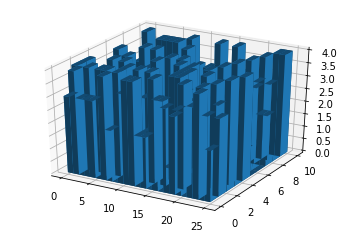

In [39]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline



np.random.seed(1234)
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
A = np.random.randint(5, size=(25, 10))

x = np.array([[i] * 10 for i in range(25)]).ravel() # x coordinates of each bar
y = np.array([i for i in range(10)] * 25) # y coordinates of each bar
z = np.zeros(25*10) # z coordinates of each bar
dx = np.ones(25*10) # length along x-axis of each bar
dy = np.ones(25*10) # length along y-axis of each bar
dz = A.ravel() # length along z-axis of each bar (height)

ax1.bar3d(x, y, z, dx, dy, dz)

